In [ ]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('raw_customer_sales_data.csv')
df.head(1)

,CustomerID,Name,Gender,Age,City,SignupDate,LastPurchaseDate,PurchaseAmount,FeedbackScore,Email,PhoneNumber,Country
0,CUST1,Lisa Simmons,FEMALE,-5,NaN,2021-03-19,2022-08-23,25828.51,3.0,patelcarlos@example.net,4165109346,NaN


In [3]:
# Getting overall idea of, What we have in our df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        9686 non-null   object 
 1   Name              10200 non-null  object 
 2   Gender            8967 non-null   object 
 3   Age               8145 non-null   object 
 4   City              7658 non-null   object 
 5   SignupDate        10200 non-null  object 
 6   LastPurchaseDate  9178 non-null   object 
 7   PurchaseAmount    9693 non-null   float64
 8   FeedbackScore     9173 non-null   float64
 9   Email             10200 non-null  object 
 10  PhoneNumber       10200 non-null  int64  
 11  Country           8130 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


In [4]:
# Getting a statistical idea of Numeric columns in df
df.describe()

,PurchaseAmount,FeedbackScore,PhoneNumber
count,9693.000000,9173.000000,1.020000e+04
mean,32457.469308,5.480541,5.023388e+09
std,84333.682203,2.858522,2.894864e+09
min,0.010000,1.000000,2.757180e+06
25%,13033.540000,3.000000,2.518427e+09
50%,25171.340000,5.000000,5.022001e+09
75%,38124.330000,8.000000,7.564881e+09
max,1000000.000000,10.000000,9.999837e+09


In [5]:
# Finding null value counts for each column
df.isna().sum()

CustomerID           514
Name                   0
Gender              1233
Age                 2055
City                2542
SignupDate             0
LastPurchaseDate    1022
PurchaseAmount       507
FeedbackScore       1027
Email                  0
PhoneNumber            0
Country             2070
dtype: int64

# Handling NaN values in Numerical Columns

In [ ]:
# df.loc[df['CustomerID'].isna()]

# Deleting records with no CustomerID because these records doesn't matter.
df = df.dropna(subset=['CustomerID'], ignore_index=True)


# Cleaning Age column: standardizing and filling NaN values.

# Creating extract_age function.
def extract_age(age):
    nums = re.findall(r'\d+', str(age))
    if nums:
        return int(nums[0])
    return np.nan

# Extracting age from Age col.
df['Age'] = df['Age'].apply(extract_age)

In [7]:
# Filling null age with Age col median.
df['Age'] = df['Age'].fillna(int(df['Age']
                                 .dropna()
                                 .astype('int64')
                                 .median()))
df['Age'].unique()

array(['5', '9', '8', '2', '29', 35, '66', '67', '27', '7', '33', '37',
       '35', '36', '50', '28', '64', '69', '42', '68', '19', '31', '47',
       '51', '59', '1', '32', '21', '58', '18', '56', '6', '4', '43',
       '48', '61', '53', '20', '49', '65', '62', '23', '24', '22', '44',
       '63', '45', '34', '38', '54', '30', '10', '70', '57', '46', '41',
       '25', '3', '26', '55', '39', '60', '40', '52'], dtype=object)

In [ ]:
# Filling PurchaseAmount NaN values with median of PurchaseAmount because of outliers.
df['PurchaseAmount'] = df['PurchaseAmount'].fillna(df['PurchaseAmount'].median())

In [ ]:
# Filling FeedbackScore NaN values with mode of FeedbackScore because it's categorical.
df['FeedbackScore'] = df['FeedbackScore'].fillna(df['FeedbackScore'].mode()[0])

# Handling inconsistent values in Categorical columns

In [ ]:
# Finding inconsistent values amongst categorical columns.
for col in df.columns:
    if df[col].nunique() < 20:
        print(df[col].value_counts())
        print('-'*50)

Gender
female    1247
male      1242
F         1217
FEMALE    1215
f         1213
M         1205
m         1178
Name: count, dtype: int64
--------------------------------------------------
City
Mumbai       454
MUMBAI       422
kolkata      421
KOLKATA      415
BANGALORE    413
Delhi        410
mumbai       410
bangalore    409
hyderabad    406
Kolkata      401
delhi        396
DELHI        394
Bangalore    394
Hyderabad    394
chennai      390
Chennai      385
CHENNAI      380
HYDERABAD    369
Name: count, dtype: int64
--------------------------------------------------
FeedbackScore
8.0     1888
3.0      907
5.0      896
2.0      877
6.0      873
4.0      860
1.0      855
9.0      851
10.0     841
7.0      838
Name: count, dtype: int64
--------------------------------------------------
Country
InDia        1899
INDIA         412
canada        406
USA           405
CANADA        401
AUSTRALIA     397
australia     396
Australia     392
Canada        384
India         384
india         

In [11]:
# Changing format of values in Gender , City and Country with .title()
for col in ['Gender','City','Country']:
    df[col] = df[col].str.title().str.strip()

In [12]:
# Changing values in Gender and Country columns.
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F':'Female'})
df['Country'] = df['Country'].replace({'Usa': 'USA', 'Uk':'UK'})

# Handling NaN values in Categorical Columns

In [13]:
df.columns

Index(['CustomerID', 'Name', 'Gender', 'Age', 'City', 'SignupDate',
       'LastPurchaseDate', 'PurchaseAmount', 'FeedbackScore', 'Email',
       'PhoneNumber', 'Country'],
      dtype='object')

In [14]:
# Filling NaN in Gender and City with 'Unknown'
df['Gender'] = df['Gender'].fillna('Unknown')
df['City'] =df['City'].fillna('Unknown')

In [15]:
# Finding records where city name is present but not the country name.
x = df.loc[(df['City'] != 'Unknown') & (df['Country'].isnull()), ['City','Country']]
# From the records we got earlier finding unique city names.
x['City'].unique()

array(['Chennai', 'Hyderabad', 'Kolkata', 'Mumbai', 'Delhi', 'Bangalore'],
      dtype=object)

In [ ]:
# Since All the city names are from India We can phil these records country name with India
# And rest with unknown.
city_to_country = {'Chennai':'India',
                   'Hyderabad':'India',
                   'Kolkata':'India',
                   'Mumbai':'India',
                   'Delhi':'India',
                   'Bangalore':'India'}
# Creating a series using map() and using it 
df['Country'] = df['Country'].fillna(df['City'].map(city_to_country))
df['Country'] =df['Country'].fillna('Unknown')

# Handling Duplicates

In [17]:
# Deleting duplicate records on the basis of CustomerID
df = df.drop_duplicates(subset=['CustomerID'], ignore_index=True)

In [18]:
df['CustomerID'].nunique() 

9686

# Normalizing column names and changing data types

In [19]:
df = df.rename(columns={'CustomerID': 'Customer_ID',
                        'SignupDate': 'Signup_Date',
                        'LastPurchaseDate': 'Last_Purchase_Date',
                        'PurchaseAmount': 'Purchase_Amount',
                        'FeedbackScore': 'Feedback_Score',
                        'PhoneNumber': 'Phone_Number'})

In [20]:
# Converting categorical columns into category data types helps 
# reducing storage size of the file.
df = df.astype({'Gender': 'category',
                'City': 'category',
                'Country': 'category'})

In [ ]:
# Age column have mixture strings and integer so first we force age into int
# And then we convert it into Int64.
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

In [22]:
# Converting Signup_Date and Last_Purchase_Date Data types in date time.
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

# Checking cleaned data readiness for analysis

In [27]:
# Making copy of df and creating a new feature from Age column

categorized = df.copy()
categorized['Age_Category'] = categorized['Age'].apply(lambda x: 'Elder' if x >= 60 else ('Adult' if x >= 30 else ('Young' if x >= 20 else 'Teen')))

In [28]:
categorized.head(3)

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country,Age_Category
0,CUST1,Lisa Simmons,Female,5,Unknown,2021-03-19,2022-08-23,25828.51,3.0,patelcarlos@example.net,4165109346,Unknown,Teen
1,CUST2,Susan Mcpherson,Male,9,Chennai,2021-11-13,2024-05-03,26589.28,2.0,smiller@example.net,6182731295,UK,Teen
2,CUST3,Jeffrey Sanchez,Male,8,Bangalore,2025-10-20,2023-08-19,33948.40,8.0,freemangabrielle@example.org,2751691858,Canada,Teen


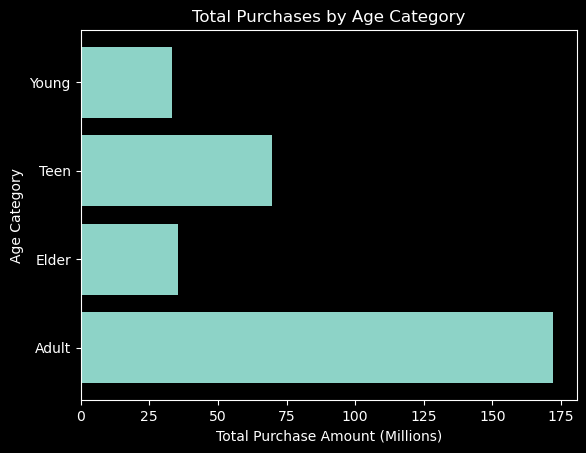

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Total Purchases by Age Category

# Aggregate total purchase by age category
purchase_by_age = (categorized.groupby('Age_Category')
                              .agg(Purchase_Amount_Millions=('Purchase_Amount', 'sum'))
                              .reset_index()
                  )
purchase_by_age['Purchase_Amount_Millions'] = purchase_by_age['Purchase_Amount_Millions'] / 1000000

# Plotting horizontal bar chart
plt.style.use('dark_background')
plt.barh(y=purchase_by_age['Age_Category'], width=purchase_by_age['Purchase_Amount_Millions'])
plt.xlabel('Total Purchase Amount (Millions)')
plt.ylabel('Age Category')
plt.title('Total Purchases by Age Category')
plt.show()

In [ ]:
# Plot 2: Monthly Purchase Amount Trend

# Create 'Month' columns
df['Month'] = df['Last_Purchase_Date'].dt.to_period('M').dt.to_timestamp()

# Group by Month and calculate total Purchase_Amount
monthly_trend = (df.groupby('Month')
                   .agg(Purchase_Amount_Millions=('Purchase_Amount','sum'))
                   .reset_index()
                )
monthly_trend['Purchase_Amount_Millions'] /= 1000000

# Plotting
plt.style.use('dark_background')

# Monthly Trend Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_trend['Month'], monthly_trend['Purchase_Amount_Millions'], marker='o', color='cyan')
plt.xlabel('Time Period')
plt.ylabel('Total Purchase Amount (Million)')
plt.title('Monthly Purchase Amount Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()